In [1]:
#!pip install plotly

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# for interactive visualizations
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly import tools

import plotly.figure_factory as ff

In [3]:
import pandas as pd

In [4]:
### Loading the Datasets
mall_data = pd.read_csv("mall.csv")

In [5]:

table = ff.create_table(mall_data)
py.iplot(table, filename='jupyter-table1')

In [6]:
print(f'{mall_data.shape[0]} samples and {mall_data.shape[1]} features in the insurance  dataset.')

200 samples and 5 features in the insurance  dataset.


In [7]:
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
mall_data[mall_data.duplicated()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [9]:
mall_data.shape

(200, 5)

In [10]:
mall_data.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
mall_data.rename(columns = {'Genre':'Gender'}, inplace = True)

In [12]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:

print('row and columns before removing outliers:',mall_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]
    

row and columns before removing outliers: (200, 5)
wait till shape after removing outlier is printed...


In [14]:
mall_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
continuous=mall_data.iloc[:,2:]

In [16]:
for i in continuous:
    print('i is',i)
    myOutliers(mall_data,i)
    print('***************************************************')

i is Age
the lower range of Age is -1.625
the upper range of Age is 79.375
total outliers in Age are 0
***************************************************
i is Annual Income (k$)
the lower range of Annual Income (k$) is -13.25
the upper range of Annual Income (k$) is 132.75
total outliers in Annual Income (k$) are 2
***************************************************
i is Spending Score (1-100)
the lower range of Spending Score (1-100) is -22.625
the upper range of Spending Score (1-100) is 130.375
total outliers in Spending Score (1-100) are 0
***************************************************


[Text(0.5, 1.0, 'Annual Income (k$)')]

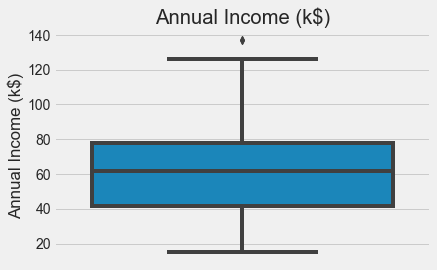

In [17]:
sns.boxplot(y=mall_data['Annual Income (k$)']).set(title='Annual Income (k$)')

### EDA

#### Data Visualization



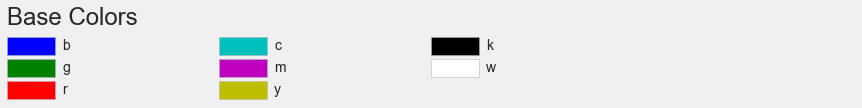

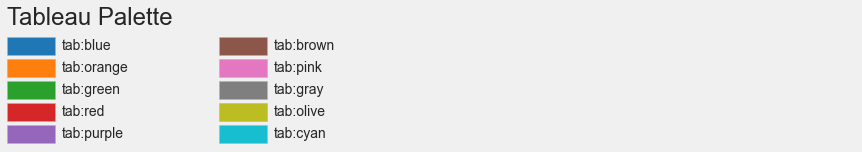

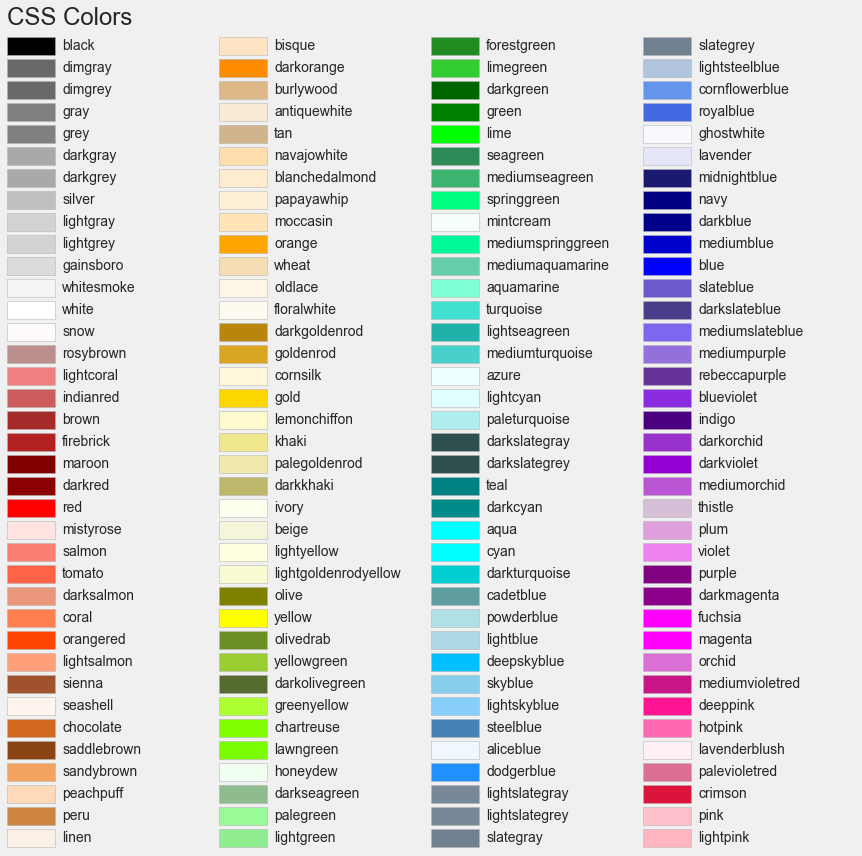

In [18]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

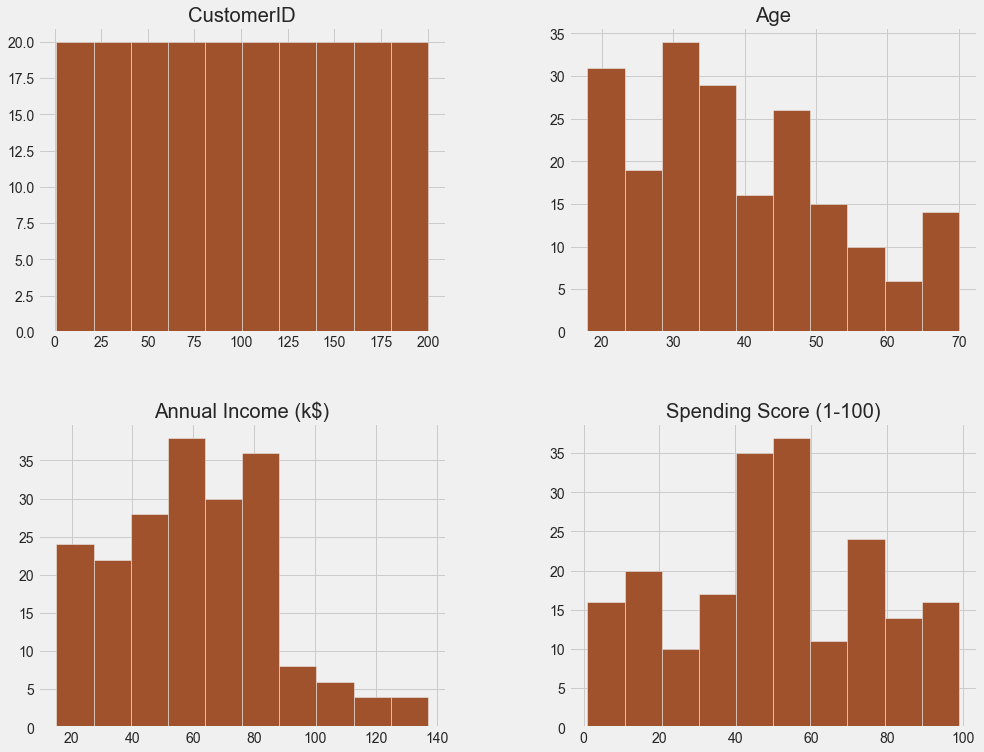

In [19]:
### hist plot
mall_data.hist(figsize = (15, 12),color = "sienna")
plt.show()

### In Age columns most people belong to 18 to 50 Age,
### Maximum Annual Income 45k to 90k.
### Maximum Spending Sore is 50

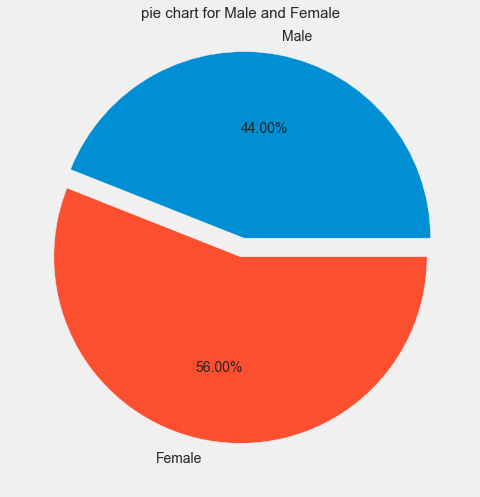

In [20]:
labels = 'Male', 'Female'
sizes = [mall_data.Gender[mall_data['Gender']=='Male'].count(), mall_data.Gender[mall_data['Gender']=='Female'].count()]
explode = (0.1,0.001)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%')
plt.title("pie chart for Male and Female", size = 15)
plt.show()

#### checking correlation 

In [21]:
corr_table=mall_data.corr()
corr_table

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

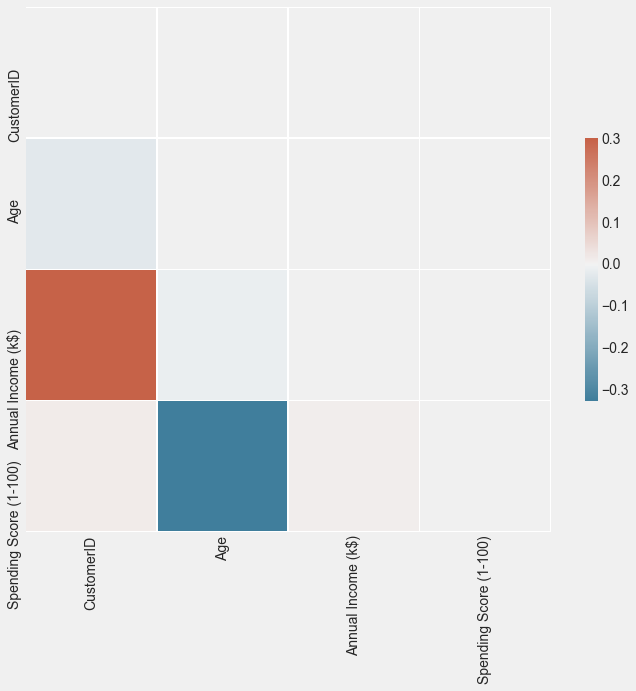

In [23]:
corr = mall_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Model Building: Clustering using K- means



In [24]:
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= mall_data.iloc[:, [3,4]].values

In [25]:
from sklearn.cluster import KMeans


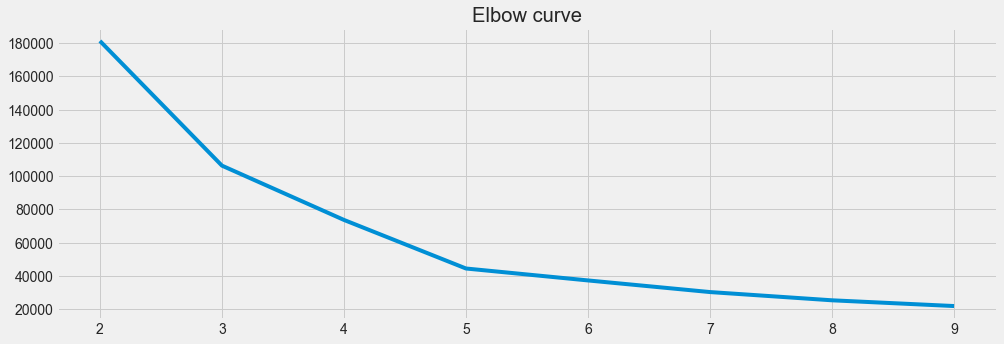

In [26]:
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

### from the above graph we got  have 2 sharp edges i.e. k=3 and k=5 but in k=3 we can see siginificant diffrence in values so we will go with k=5

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481


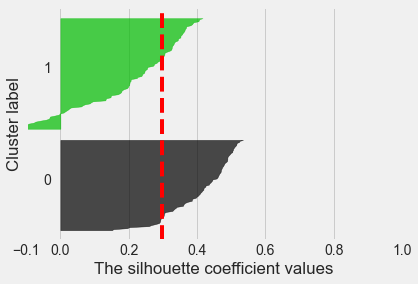

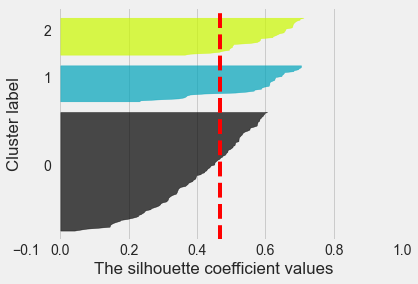

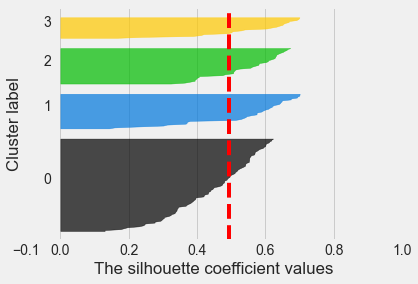

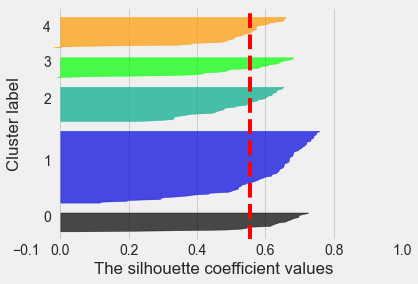

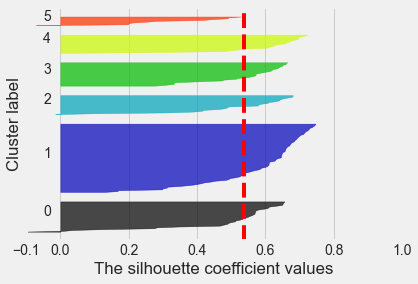

In [28]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

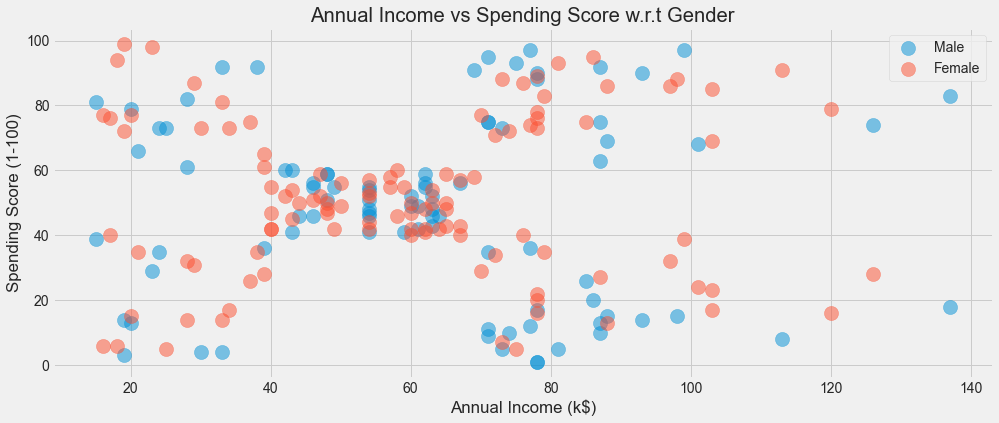

In [29]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = mall_data[mall_data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), 
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [30]:
model = KMeans(n_clusters= 6)
y_kmeans= model.fit_predict(X)

In [31]:
y_kmeans

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 1, 5, 4, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

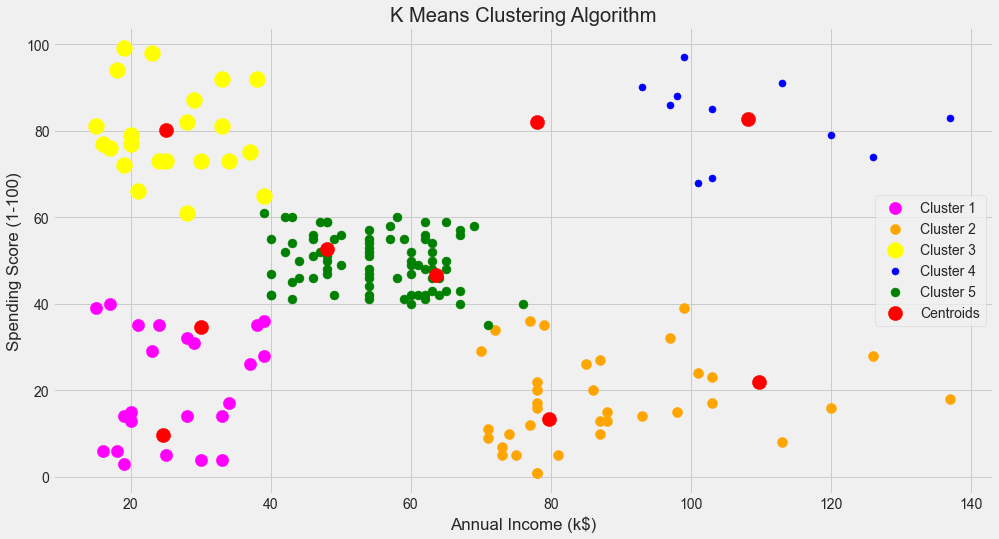

In [32]:
#Visualizing all the clusters 
plt.figure(1 , figsize = (15 , 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 150, c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')  ## Cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 250, c = 'yellow', label = 'Cluster 3')  ## Cluster 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'blue', label = 'Cluster 4')  ## Cluster 4
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 80, c = 'green', label = 'Cluster 5')   ## Cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### DBSCAN

In [33]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
mall_data["Gender"]=labelencoder.fit_transform(mall_data["Gender"])  # Encoding Top genre

In [35]:

mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



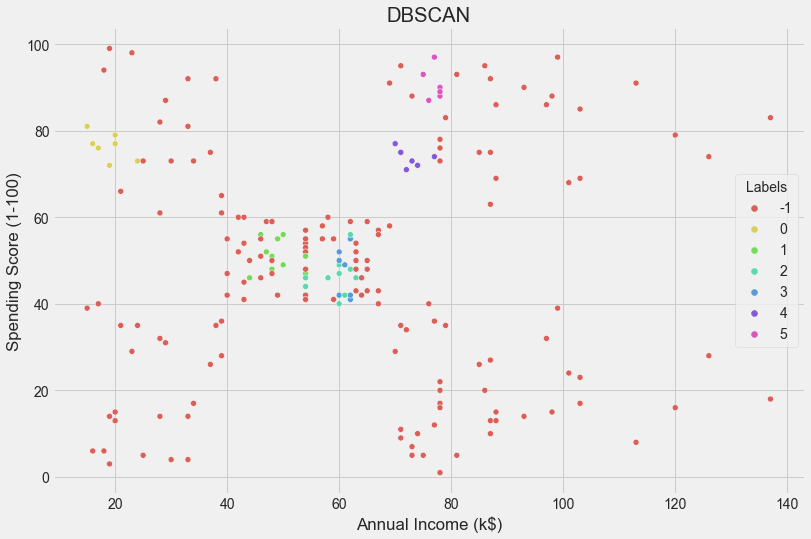

In [36]:
db=DBSCAN(eps=11, min_samples=6).fit(mall_data)

mall_data['Labels'] = db.labels_
plt.figure(figsize=(12, 8)) 
sns.scatterplot(mall_data['Annual Income (k$)'],mall_data['Spending Score (1-100)'], hue=mall_data['Labels'], 
                 palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))

plt.title('DBSCAN')
plt.show()

In [37]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,1,19,15,39,-1
1,2,1,21,15,81,0
2,3,0,20,16,6,-1
3,4,0,23,16,77,0
4,5,0,31,17,40,-1
...,...,...,...,...,...,...
195,196,0,35,120,79,-1
196,197,0,45,126,28,-1
197,198,1,32,126,74,-1
198,199,1,32,137,18,-1


C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



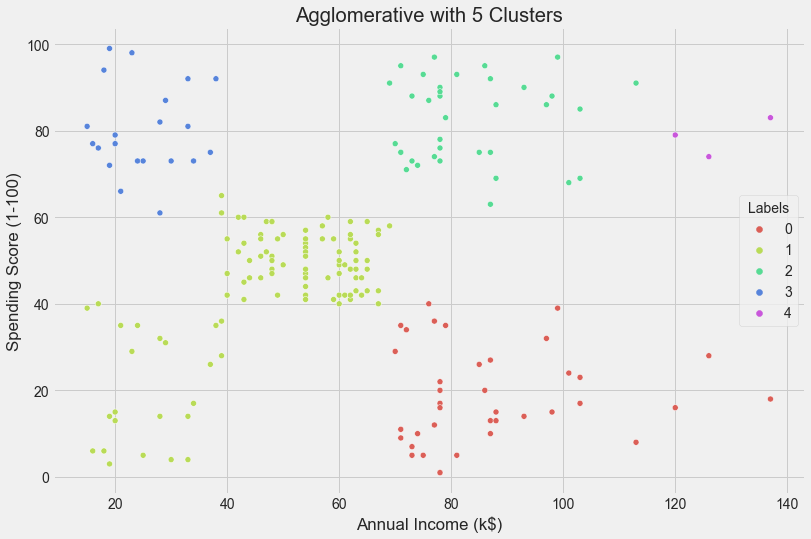

In [38]:
#Agglomerative Clustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

mall_data['Labels']= agglom.labels_

plt.figure(figsize=(12, 8))

sns.scatterplot(mall_data['Annual Income (k$)'],mall_data['Spending Score (1-100)'], hue=mall_data['Labels'],
                palette=sns.color_palette( 'hls', np.unique(agglom.labels_).shape[0]))

plt.title('Agglomerative with 5 Clusters') 
plt.show()

In [39]:
### Loading the Datasets
mall_data = pd.read_csv("mall.csv")

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
mall_data["Genre"]=labelencoder.fit_transform(mall_data["Genre"])  # Encoding Top genre

In [41]:
mall_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [42]:
eps= 0.4
min_samples= 10
scale_columns=['Annual Income (k$)',
       'Spending Score (1-100)']
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
mall_data['clusterid'] = dbscan.fit_predict(mall_data[scale_columns])

### Plotting the Clusters

Text(0.5, 1.0, 'DBSCAN')

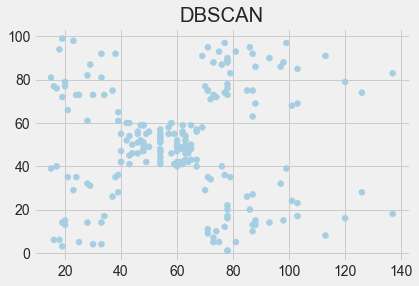

In [43]:
import matplotlib.pyplot as plt
y_pred=mall_data['clusterid']
plt.scatter(mall_data['Annual Income (k$)'], mall_data['Spending Score (1-100)'],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

#### hdbscan

In [44]:
import hdbscan

In [45]:
### Apply clustering

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)

HDBSCAN(gen_min_span_tree=True)

### Minimum Spanning Tree
### Let us have a look at the minium spanning tree that is computed based on the mutual reachbility.

<AxesSubplot:>

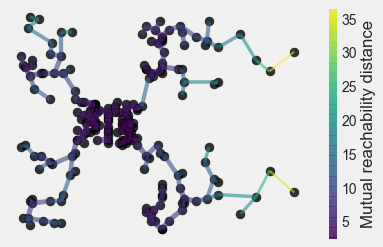

In [46]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

### Cluster Hierarchy
### Now, we will look at the hierachy that can be derived from the spanning tree.

<AxesSubplot:ylabel='distance'>

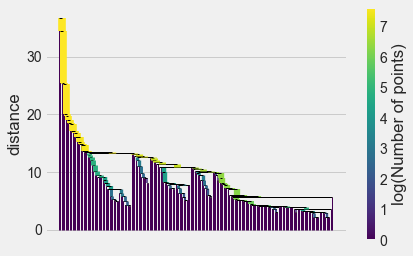

In [47]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Condense Hierarchy

<AxesSubplot:ylabel='$\\lambda$ value'>

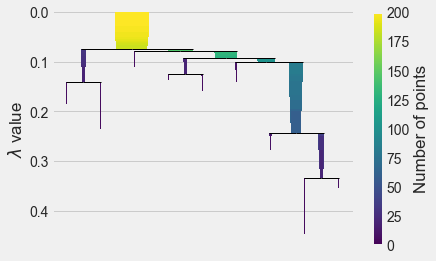

In [48]:
clusterer.condensed_tree_.plot()

### Get Clusters from Hierarchy

<AxesSubplot:ylabel='$\\lambda$ value'>

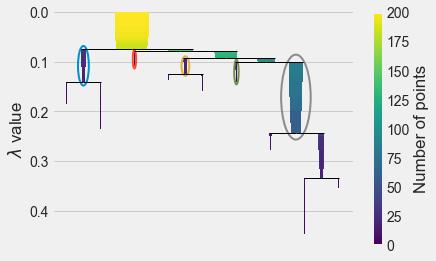

In [49]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

### Plot Final Clusters

In [50]:
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


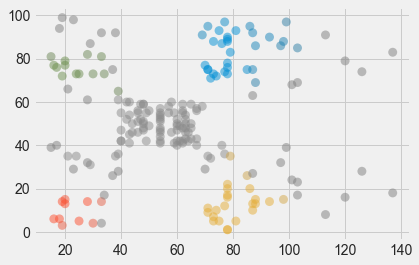

In [51]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)